# Data Augmentation

In [ ]:
data augmentation occures wen u create new data based on the modificatins of ur existing data. 
Images can be applied with transformations like 
flipping
rotating
cropping 
and changing color


In [7]:
from matplotlib import pyplot as plt
import numpy as np
import keras
from scipy import misc,ndimage
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [8]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [9]:
gen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.15,shear_range=0.3,zoom_range=0.1,channel_shift_range=10,horizontal_flip=True)

# augment data  much more parameters   https://keras.io/preprocessing/image/

In [10]:
image_path='cats-and-dogs/train/dog/dog.215.jpg'

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  from ipykernel import kernelapp as app


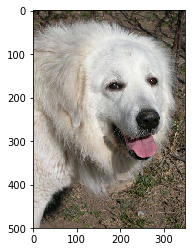

In [11]:
#create image
image=np.expand_dims(ndimage.imread(image_path),0)
plt.imshow(image[0])

In [12]:
# create batched of ugmented images from this image
aug_iter=gen.flow(image)

In [13]:
# get 10 samples of augmented images
aug_images=[next(aug_iter)[0].astype(np.uint8) for i in range(10) ]

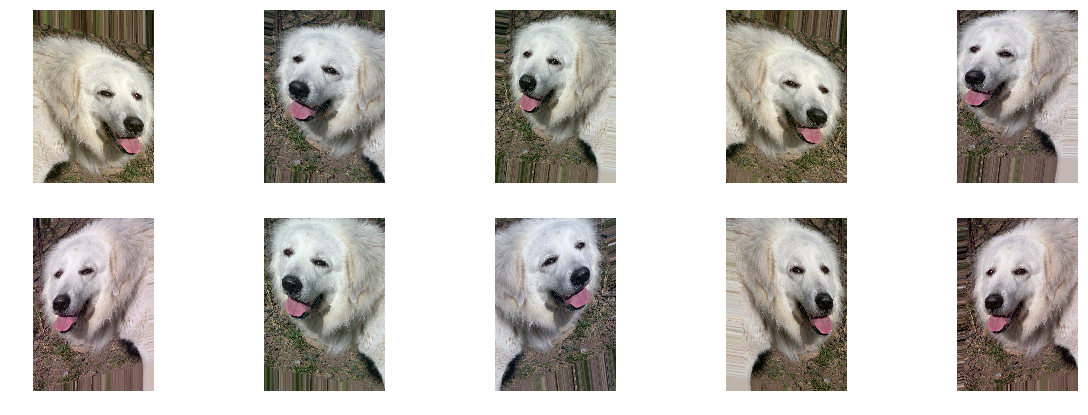

In [14]:
plots(aug_images,figsize=(20,7),rows=2)